In [124]:
import numpy as np
import math
from sklearn import preprocessing

# Calculating mean crossing rate
def mean_crossing_rate(arr):
    arr = arr - np.mean(arr)
    count = 0
    for i in range(1, len(arr)):
        if arr[i-1]*arr[i] < 0:
            count+=1
    return count

# Extracting mean, median, std, mean crossing rate and correlation between X,Y and Z
def extract_features(data_xyz):
    # Normalizing data before feature extraction
    if data_xyz.shape[0]==0 or data_xyz.shape[1]!=3:
        return None
    features = list()
    for col in range(data_xyz.shape[1]):
        features.append(np.mean(data_xyz[:,col]))
        features.append(np.median(data_xyz[:,col]))
        features.append(np.std(data_xyz[:,col]))
        features.append(mean_crossing_rate(data_xyz[:,col]))
    features.append(np.correlate(data_xyz[:,0], data_xyz[:,1]))
    features.append(np.correlate(data_xyz[:,0], data_xyz[:,2]))
    features.append(np.correlate(data_xyz[:,1], data_xyz[:,2]))
    return features


(14897, 25)
(270, 15)
270


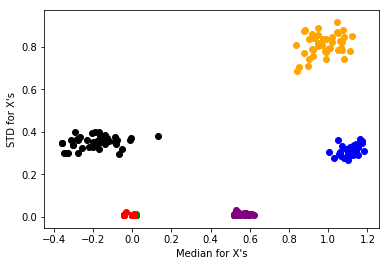

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [125]:
data = np.genfromtxt("/Users/bhushan/Documents/UCI_MS_NETSYS/CS244_Embedded/HomeworkSubmission/HW7/TrainingData.csv",delimiter=",", skip_header=1, dtype=float)
print data.shape
window_size = 330

numrows = int(float(data.shape[0])/window_size)

X = np.empty((numrows*6, 15))
Y = list()
iteration = 0

for cls in range(1, 7):
    i = 0
    while i < numrows*window_size:
        X[iteration] = extract_features(data[i:i+window_size,4*(cls-1)+1:4*(cls-1)+4])
        Y.append(cls)
        i += window_size
        iteration+=1
print X.shape
print len(Y)
import matplotlib.pyplot as plt
temp = 45
plt.scatter(X[:temp,1], X[:temp,2], color='g')
plt.scatter(X[temp:2*temp,1], X[temp:2*temp,2], color='r')
plt.scatter(X[2*temp:3*temp,1], X[2*temp:3*temp,2], color='b')
plt.scatter(X[3*temp:4*temp,1], X[3*temp:4*temp,2], color='black')
plt.scatter(X[4*temp:5*temp,1], X[4*temp:5*temp,2], color='orange')
plt.scatter(X[5*temp:6*temp,1], X[5*temp:6*temp,2], color='purple')
plt.xlabel("Median for X's")
plt.ylabel("STD for X's")
plt.show()
print Y

In [126]:
# KNN Classifier
import mltools as ml
from sklearn import neighbors, preprocessing
XS, params = ml.rescale(X)
# XS = preprocessing.normalize(X, axis=0, norm = 'max')
# Shuffle data
XS,YS = ml.shuffleData(XS,Y)
# Split data into training and validation
Xtr,Xva,Ytr,Yva = ml.splitData(XS,YS, 0.80)

# Training KNN model
knn=neighbors.KNeighborsClassifier()
knn.fit(Xtr, Ytr)
# Predicting values for validation data
Yhat = knn.predict(Xva)
# print list(Yhat)
# print list(Yva)
print Yhat
print Yva
error = np.mean( Yhat != Yva )
print "Error rate KNN model:- ", error


[2 5 5 3 2 5 6 1 6 4 5 5 1 1 1 4 4 2 4 1 2 3 2 1 6 1 1 3 3 4 4 6 2 3 5 6 2
 4 3 2 5 2 4 4 4 4 4 6 5 1 5 4 6 1]
[2 5 5 3 2 5 6 1 6 4 5 5 1 1 1 4 4 2 4 1 2 3 2 1 6 1 1 3 3 4 4 6 2 3 5 6 2
 4 3 2 5 2 4 4 4 4 4 6 5 1 5 4 6 1]
Error rate KNN model:-  0.0


In [140]:
data = np.genfromtxt("/Users/bhushan/Documents/UCI_MS_NETSYS/CS244_Embedded/HomeworkSubmission/HW7/standing.csv",delimiter=",", skip_header=1, dtype=float)
num_rows = data.shape[0]
window_size = 330
X = np.empty((int(math.ceil((float(num_rows)/window_size))), 15))

iteration = 0
i = 0
while i < data.shape[0]:
    X[iteration] = extract_features(data[i:i+window_size,3:6])
    i += window_size
    iteration+=1

X1S, _ = ml.rescale(X, params)
print knn.predict(X1S)

91
